# Confidence

We want to know if changing the confidence that BISICLES has in the velocity observations has a significant effect on the resulting fields for C and muCoef. So here we solve the inverse problem with the same inputs but with different spatial fields of the confidence parameter:


$$ \text{conf} = \exp \left( {-\alpha \frac{\sqrt{\sigma^2 + \epsilon^2}}{|v|}} \right) $$

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
obs = xr.open_dataset("/Users/jonniebarnsley/data/MEaSUREs/MEaSUREs_antarctica_v2_bisicles_1km.nc")

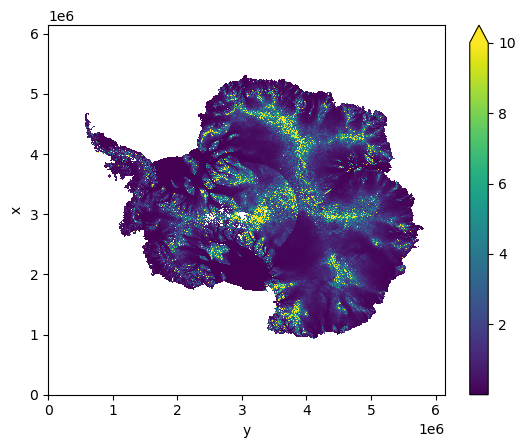

In [4]:
noise_to_signal = np.hypot(obs['std'], obs['err']) / abs(obs['speed'])
noise_to_signal.plot(vmax=10)

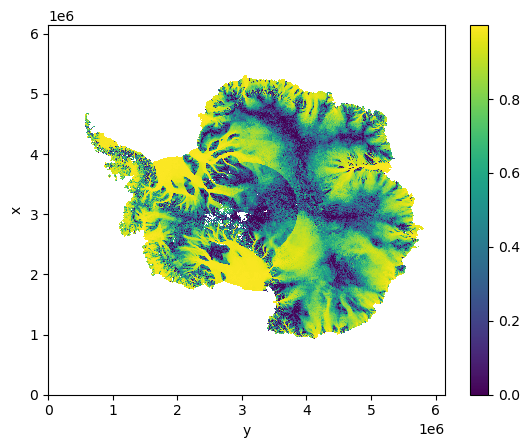

In [5]:
conf = np.exp(-0.5 * noise_to_signal)
conf.plot()

## Results

In [21]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/last_iter.nc')
file

<xarray.Dataset> Size: 1GB
Dimensions:        (x: 6144, y: 6144)
Coordinates:
  * x              (x) float64 49kB 500.0 1.5e+03 ... 6.142e+06 6.144e+06
  * y              (y) float64 49kB 500.0 1.5e+03 ... 6.142e+06 6.144e+06
Data variables:
    crs            int32 4B ...
    time_of_array  float64 8B ...
    xVelb          (y, x) float64 302MB ...
    yVelb          (y, x) float64 302MB ...
    Cwshelf        (y, x) float64 302MB ...
    muCoef         (y, x) float64 302MB ...
Attributes: (12/13)
    Conventions:         CF-1.7
    component_0:         xVelb
    component_1:         yVelb
    component_2:         Cwshelf
    component_3:         muCoef
    filetype:            VanillaAMRFileType
    ...                  ...
    num_components:      4
    num_levels:          4
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  slc removed this feature to see if it was causing chaos

In [22]:
speed = np.hypot(file.xVelb, file.yVelb)
misfit = speed - obs['speed'].rename({'x': 'y', 'y': 'x'})

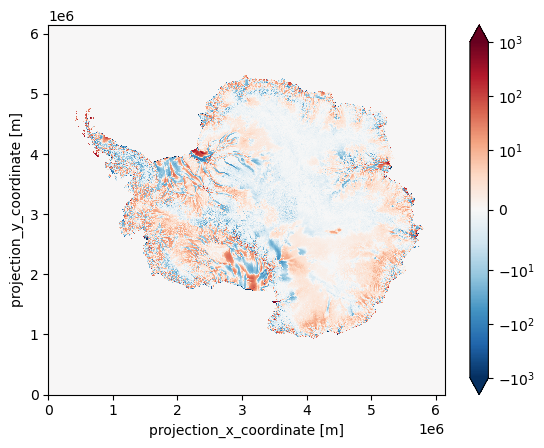

In [25]:
from matplotlib.colors import SymLogNorm
misfit.plot(norm=SymLogNorm(10, vmin=-1e3, vmax=1e3))

In [26]:
normal = xr.open_dataset('/Users/jonniebarnsley/Downloads/normal_last_iter.nc')
normal_speed = np.hypot(normal.xVelb, normal.yVelb)
normal_misfit = normal_speed - obs['speed'].rename({'x': 'y', 'y': 'x'})

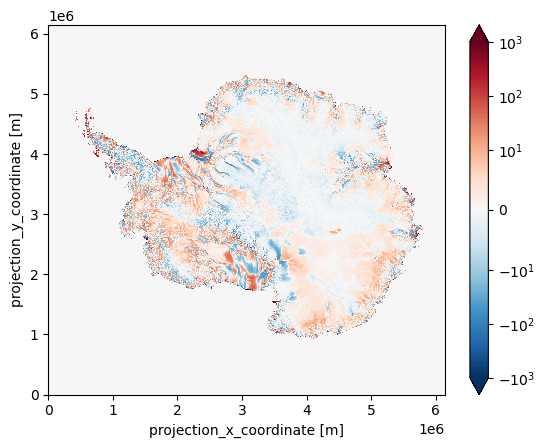

In [27]:
normal_misfit.plot(norm=SymLogNorm(10, vmin=-1e3, vmax=1e3))

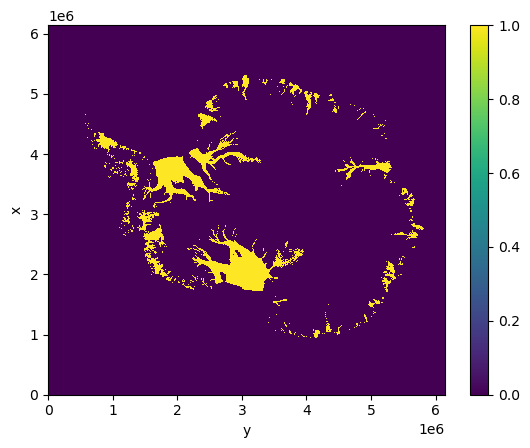

In [28]:
high_conf = conf > 0.95
high_conf.plot()

In [32]:
newconf_score = abs(misfit.where(high_conf)).sum()
normal_score = abs(normal_misfit.where(high_conf)).sum()

In [39]:
misfit = misfit.clip(min=-1000, max=1000)
normal_misfit = normal_misfit.clip(min=-1000, max=1000)

In [43]:
print(
    abs(misfit).sum().values,
    abs(normal_misfit).sum().values
)

97815750.50964236 98925776.73287532


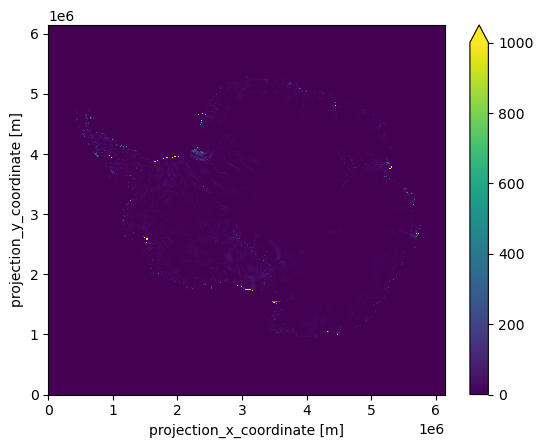

In [36]:
abs(misfit).plot(vmax=1000)

In [44]:
misfit_weighted = misfit * conf
normal_misfit_weighted = normal_misfit * conf

In [46]:
print(
    abs(misfit_weighted.where(high_conf)).sum().values,
    abs(normal_misfit_weighted.where(high_conf)).sum().values
)

9633853.744108053 9643342.531421382
